Чем лучше бустить? Тестируем алгоритмы бустинга в бою.

Цель:
В этом домашнем задании вам предстоит провести детективную работу и узнать, какой же алгоритм бустинга работает лучше всего (конечно, применительно к конкретной задаче).


# Часть 1. EDA

Выберите любой интересующий вас датасет по классификации или регрессии (выбран предсказание оттока пользователей https://www.kaggle.com/blastchar/telco-customer-churn)

По выбранному датасету проведите EDA, познакомьтесь с признаками, посмотрите зависимости и т.д.

Вот краткое описание основных полей датасета **Telco Customer Churn**:

- **customerID** — уникальный идентификатор клиента.
- **gender** — пол клиента (Male, Female).
- **SeniorCitizen** — пенсионер (1 — да, 0 — нет).
- **Partner** — наличие супруга/супруги (Yes/No).
- **Dependents** — наличие иждивенцев (Yes/No).
- **tenure** — количество месяцев, которые клиент пользуется услугой.
- **PhoneService** — наличие телефонной связи (Yes/No).
- **MultipleLines** — есть ли несколько телефонных линий (Yes/No/No phone service).
- **InternetService** — тип интернет-услуги (DSL, Fiber optic, No).
- **OnlineSecurity** — наличие онлайн-защиты (Yes/No/No internet service).
- **OnlineBackup** — наличие онлайн-резервного копирования (Yes/No/No internet service).
- **DeviceProtection** — защита устройства (Yes/No/No internet service).
- **TechSupport** — поддержка клиентов (Yes/No/No internet service).
- **StreamingTV** — доступ к потоковому телевидению (Yes/No/No internet service).
- **StreamingMovies** — доступ к потоковым фильмам (Yes/No/No internet service).
- **Contract** — тип контракта (Month-to-month, One year, Two year).
- **PaperlessBilling** — электронные счета (Yes/No).
- **PaymentMethod** — способ оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).
- **MonthlyCharges** — ежемесячные платежи (число).
- **TotalCharges** — общая сумма платежей клиента (число).
- **Churn** — ушёл ли клиент (Yes/No — целевая переменная).[1][2][3][4]


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [48]:
df[df.TotalCharges == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [49]:
# В 11 строках есть пропуски в TotalCharges. Удалим их, что бы не мешали

df = df.drop(df[df.TotalCharges == ' '].index)
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [51]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [52]:
df.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [53]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('SeniorCitizen')
num_cols

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [54]:
cat_cols = df.columns.drop(num_cols).drop('customerID')
cat_cols

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

## Смотрим распределение 

array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

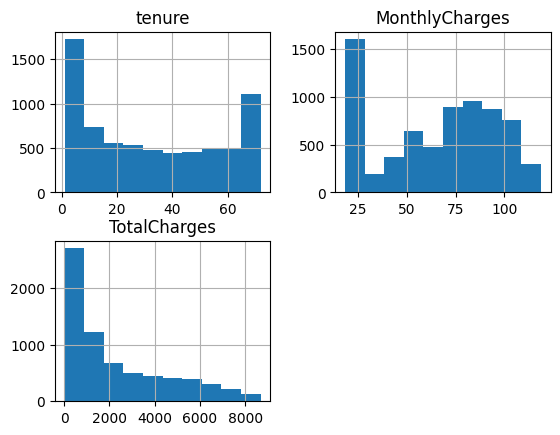

In [55]:
df[num_cols].hist()

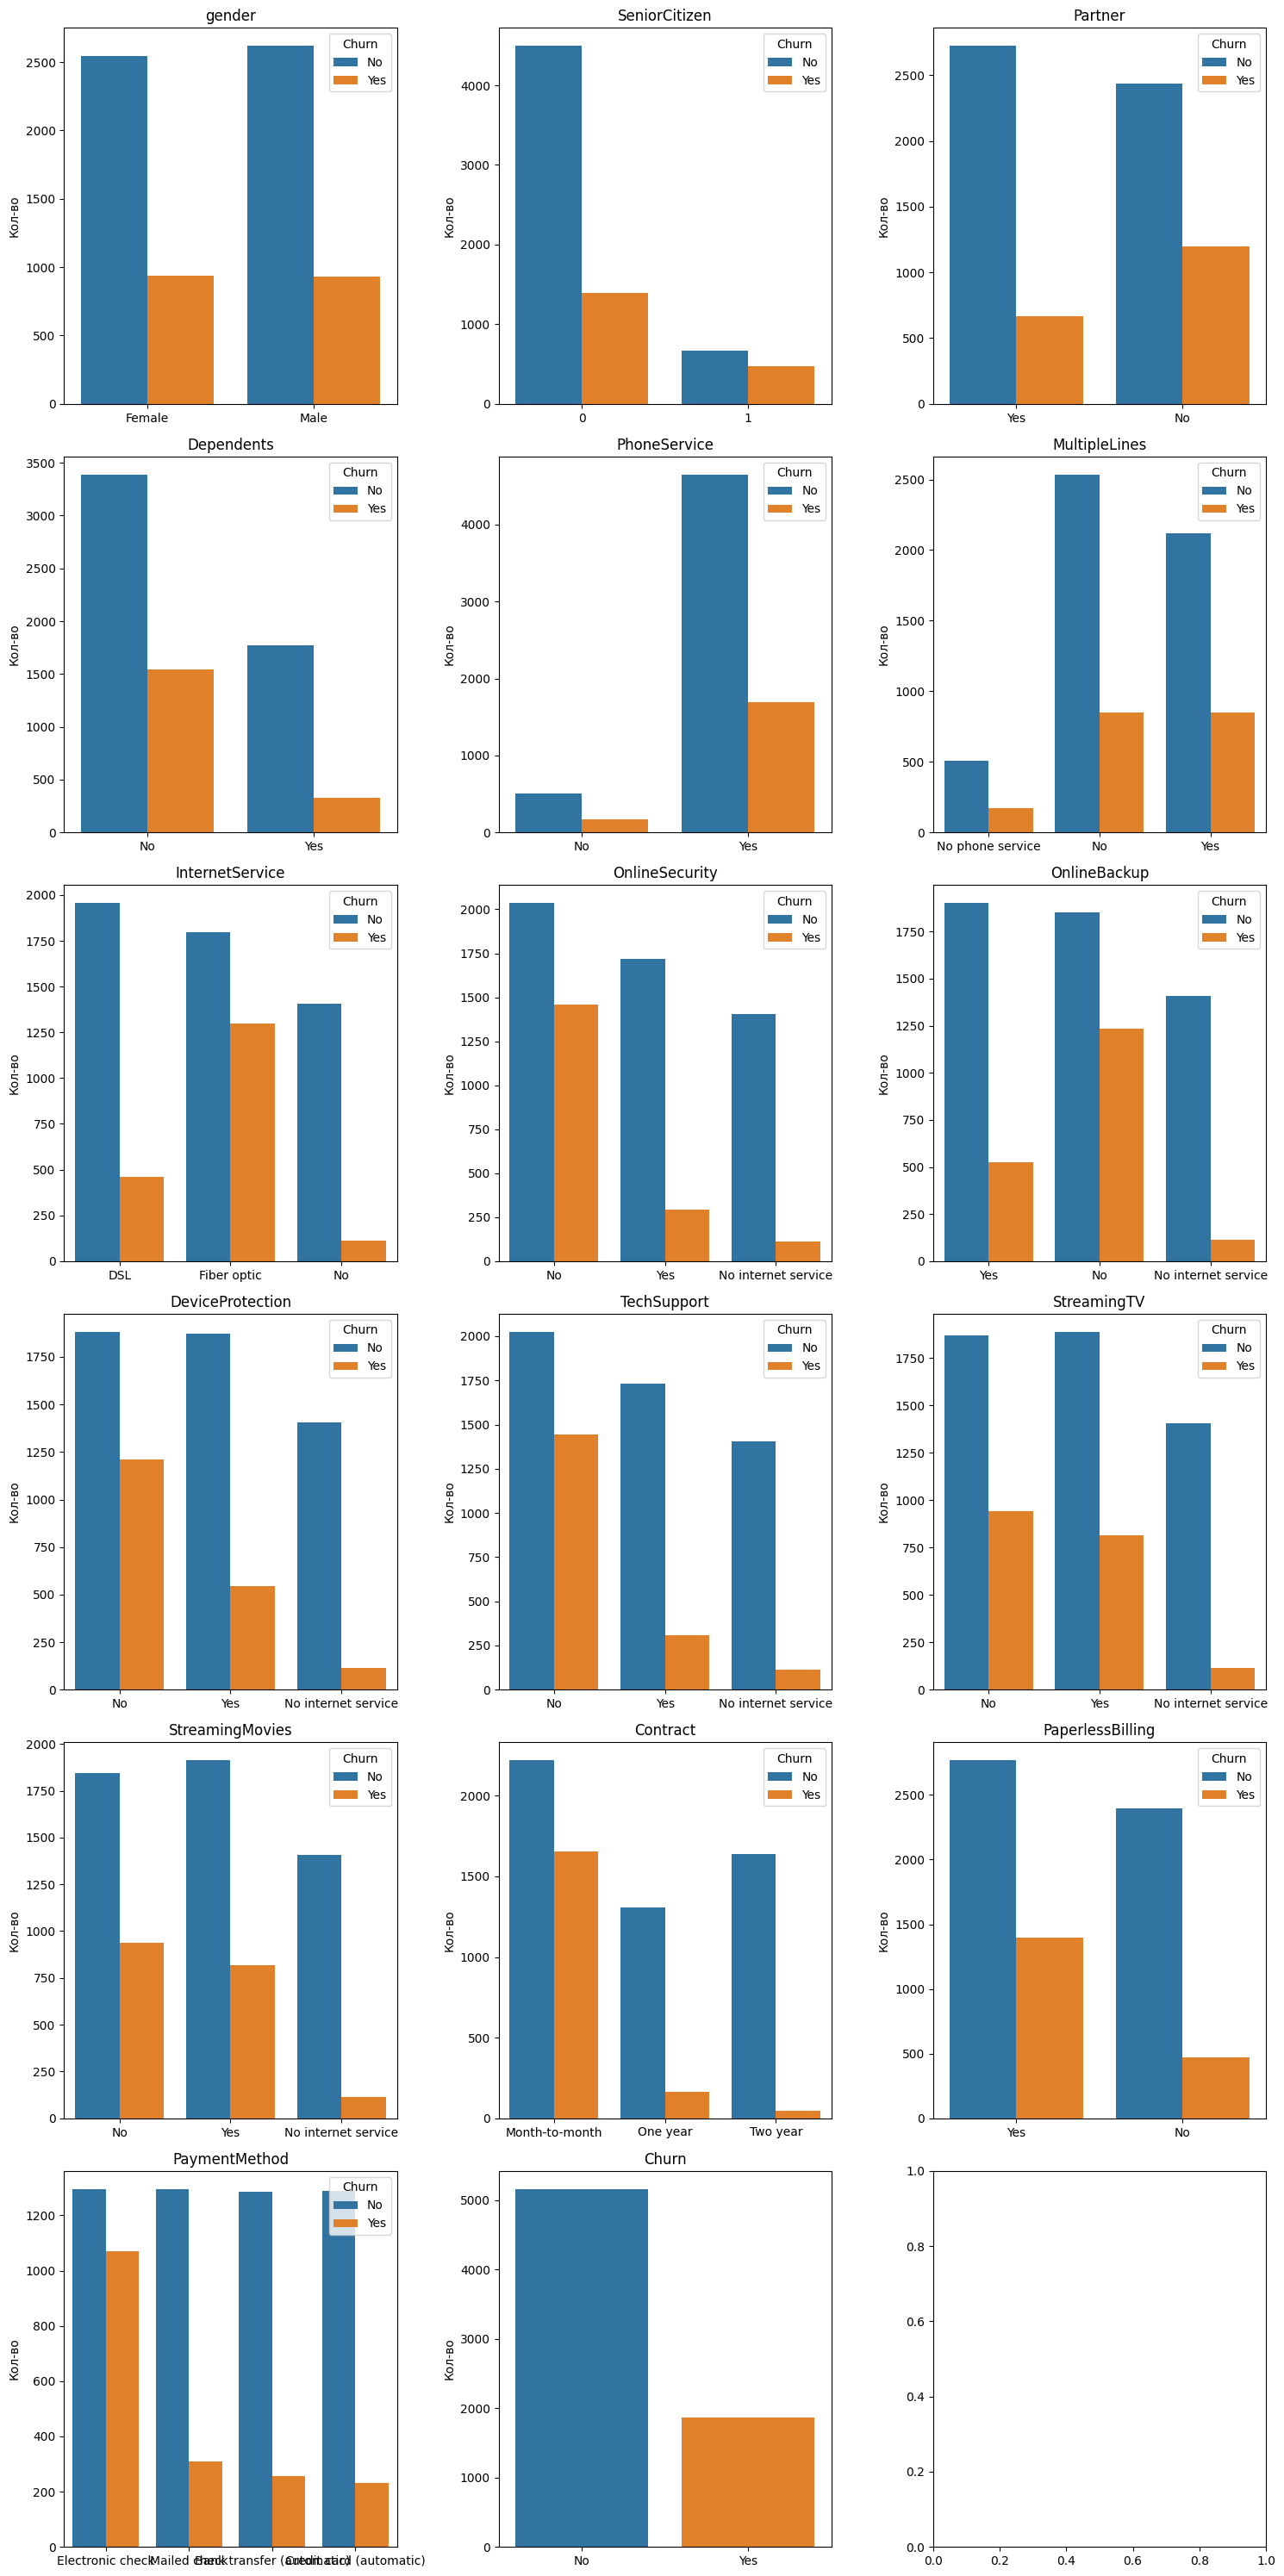

In [61]:
cols = len(cat_cols)
fig, axes = plt.subplots(nrows=(cols+2)//3, ncols=3, figsize=(15, 5*((cols+2)//3)))

for i, col in enumerate(cat_cols):
    ax = axes[i // 3, i % 3]
    sns.countplot(x=col, data=df, ax=ax, hue='Churn')
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('Кол-во')

plt.tight_layout()
plt.show()

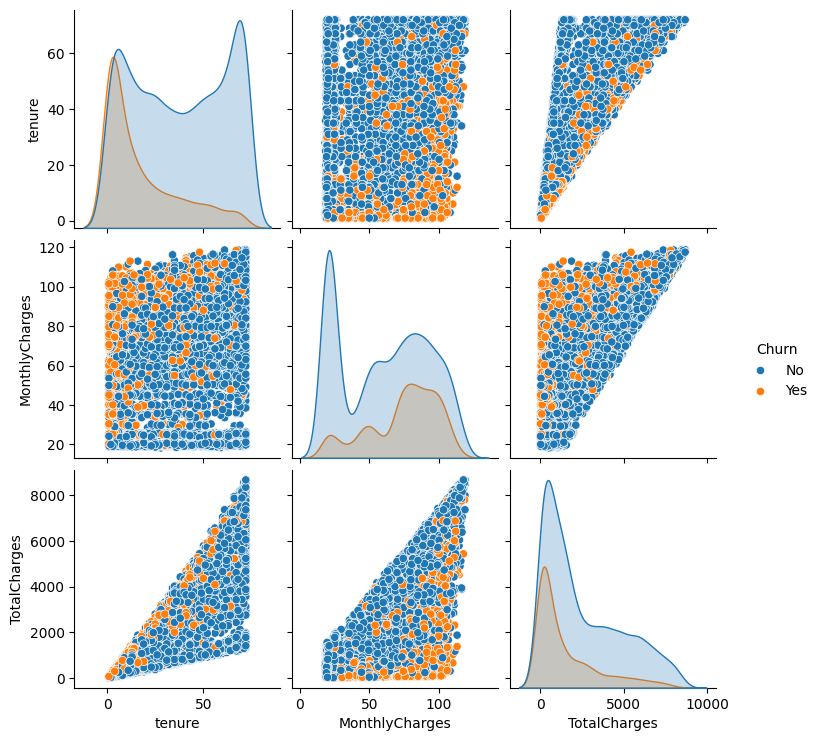

In [38]:
sns.pairplot(df.drop('SeniorCitizen', axis=1), hue='Churn')

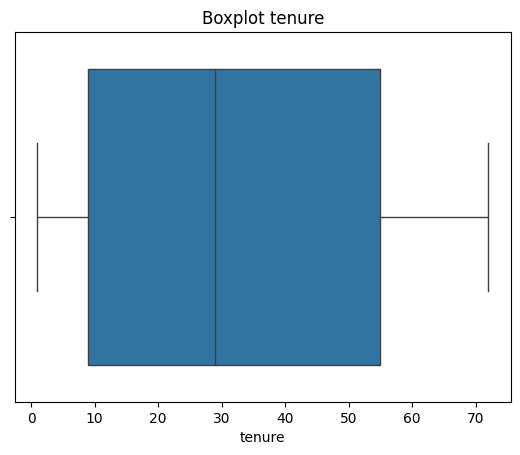

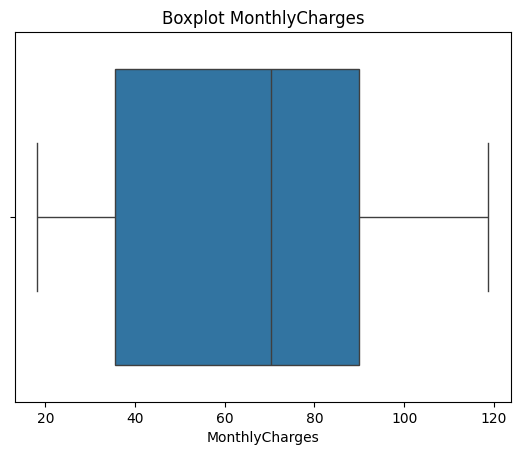

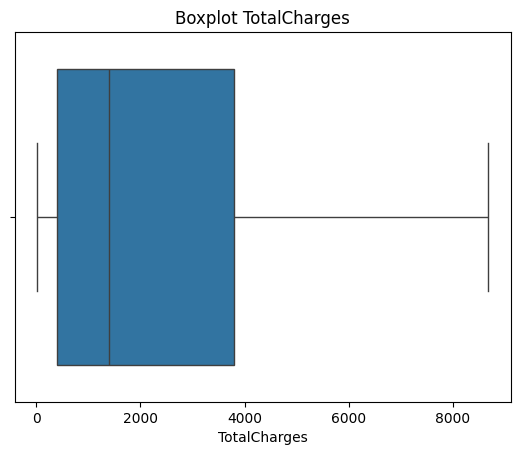

In [43]:
# Проверим выбросы

for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot {col}")
    plt.show()



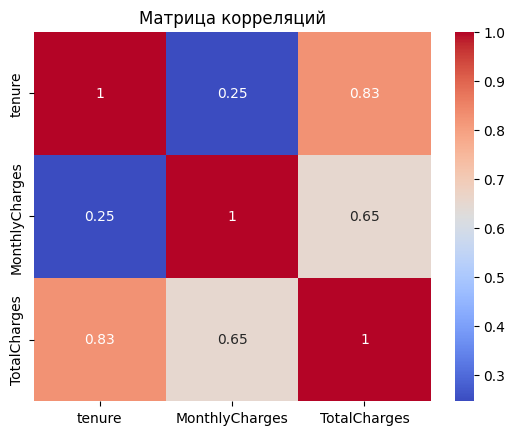

In [44]:
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Матрица корреляций")
plt.show()

## Итог

Выбросов не обнаружено.

Пропуски мы удалили

Gender явно не влияет на целевую переменную, его выкинем

TotalChanges логично коррелирует с двумя другими признаками. Тоже попробуем без него.
- Хотя тут возникает логичный вопрос - а зачем из-за него выкинули 11 наблюдений

# Часть 2. Preprocessing & Feature Engineering

Хотя цель этого задания - посмотреть на работу алгоритмов, тем не менее пропускать препроцессинг нельзя :)
Так что переведите категориальные переменные в уникальные лейблы при помощи LabelEncoder, попробуйте добавить новые переменные и выкинуть лишние и, наконец, разбейте данные на train-test.

!!!


Тут нужно подумать, кого кодировать Label, а кого OneHot.

Например, Contract явно напрашивается на Лабел. Чем длиньше контракт, тем лучше

# Часть 3. Who's the mightiest of them all?

Постройте 4 варианта градиентного бустинга, используя значения гиперпараметров “из коробки”: реализация из sklearn, XGBoost, CatBoost, LightGBM
Проверьте качество на отложенной выборке, кто пока лидирует?
Теперь проведите настройку гиперпараметров моделей на кросс-валидации, можно настраивать только самые основные гиперпараметры - число итераций бустинга, max_features, subsample и т.д.
Снова проверьте качество уже настроенных моделей. Кто в итоге победил?